<a href="https://colab.research.google.com/github/allen17mv/Machine-Learning-Mini-Proj/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torchvision
import torchsummary
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm.notebook import tqdm
#from google.colab import file
import os
import warnings
warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_transform = transforms.Compose([
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225] )
                                      ])
test_transform = transforms.Compose([
                                      transforms.Resize(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225] )
                                      ])

In [ ]:
train_data = datasets.CIFAR100(
                               train=True,
                               download = True,
                               root = './data',
                               transform = train_transform
                               )
test_data = datasets.CIFAR100(
                               train=False,
                               download = True,
                               root = './data',
                               transform = test_transform
                               )

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
classes = train_data.classes
print(len(classes))
print(classes)

100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tr

In [ ]:
print('Train Dataset size : ',len(train_data))
print('Test Dataset size : ',len(test_data))

Train Dataset size :  50000
Test Dataset size :  10000


In [ ]:
train_loader = DataLoader(train_data, batch_size = 4, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 4, shuffle = False)

In [ ]:
def show_imgs(imgs,title):
  imgs = imgs.cpu()
  mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
  std = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
  imgs = imgs * std + mean
  img_grid = torchvision.utils.make_grid(imgs,nrow= 4)
  img_np = img_grid.numpy()
  img_np = np.transpose(img_np,(1,2,0))
  plt.figure(figsize = (8,4))
  plt.imshow(img_np)
  plt.title(title)
  plt.show()    

Examples : 


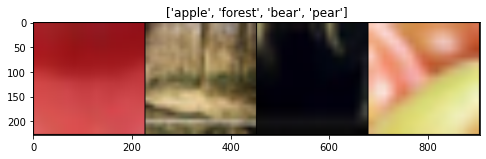

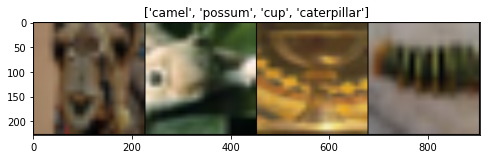

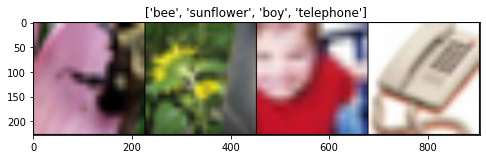

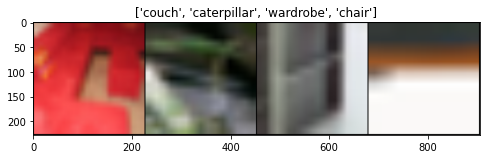

In [ ]:
print('Examples : ')
for i,batch in enumerate(train_loader):
  if i == 4:
    break
  images,labels = batch
  show_imgs(images,str([classes[i] for i in labels]))  

Examples : 


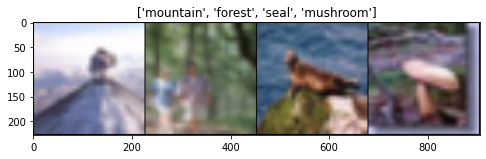

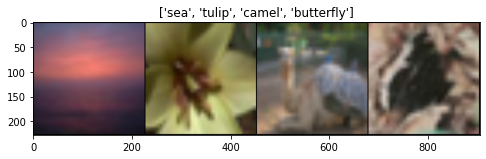

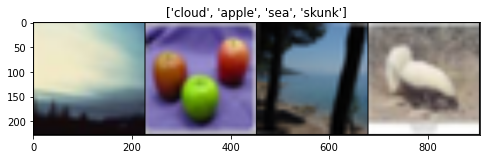

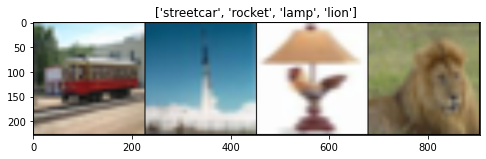

In [ ]:
print('Examples : ')
for i,batch in enumerate(test_loader):
  if i == 4:
    break
  images,labels = batch
  show_imgs(images,str([classes[i] for i in labels]))  

In [ ]:
import torchvision.models as models
import torch.utils.model_zoo
model = models.resnet18()
model = models.resnet18(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
torchsummary.summary(model.to(device),input_size = (3,224,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 122]           9,408
       BatchNorm2d-2         [-1, 64, 112, 122]             128
              ReLU-3         [-1, 64, 112, 122]               0
         MaxPool2d-4           [-1, 64, 56, 61]               0
            Conv2d-5           [-1, 64, 56, 61]          36,864
       BatchNorm2d-6           [-1, 64, 56, 61]             128
              ReLU-7           [-1, 64, 56, 61]               0
            Conv2d-8           [-1, 64, 56, 61]          36,864
       BatchNorm2d-9           [-1, 64, 56, 61]             128
             ReLU-10           [-1, 64, 56, 61]               0
       BasicBlock-11           [-1, 64, 56, 61]               0
           Conv2d-12           [-1, 64, 56, 61]          36,864
      BatchNorm2d-13           [-1, 64, 56, 61]             128
             ReLU-14           [-1, 64,

In [ ]:
for param in model.parameters():
  param.requires_grad = False
in_features = model.fc.in_features
model.fc = nn.Linear(in_features,100)  

In [ ]:
#img_grid = torchvision.utils.make_grid(torch.tensor(images))
#print(img_grid.size())
#img_grid_np = np.transpose(img_grid_np,(1,3,1,1))
#plt.imshow(img_grid_np)
#print(img_grid.min(),img_grid.max()) 
#mean = np.resize(np.array([0.485, 0.456, 0.406]),(1,3,1,1))
#std = np.resize(np.array([0.229, 0.224, 0.225]),(1,3,1,1))
#print(img_grid_np.shape)
#print(mean.shape)
#print(std.shape)

In [ ]:
def unnorm(images):
  mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
  std = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
  images = images * std + mean
  return images

def show_images(images,labels):
  images = unnorm(images).numpy()
  fig = plt.figure(figsize=(8,8))
  for i in range(8):
    ax = fig.add_subplot(2,4,i+1,xticks=[],yticks=[])
    image = np.transpose(images[i],(1,2,0))
    plt.imshow(image)
    ax.set_title(classes[labels[i]])
  return fig


In [ ]:
def evaluate(model,dataloader):
  total,correct = 0,0
  model.eval()
  for batch in dataloader:
    images,labels = batch
    images,labels =images.to(device),labels.to(device)
    outs=model(images)
    out_labels = torch.argmax(outs,axis=1)
    total += labels.size(0)
    correct += (labels==out_labels).sum().item()
  return 100 * correct/total


In [ ]:
import copy

def train(model,modelname,loss_fn,optimizer,train_loader,test_loader,epochs):
  hist = { 'epoch_loss':[], 'train_acc' : [] , 'test_acc' : []}
  min_loss = 10e+10
  for epoch in tqdm(range(1,epochs+1), total = epochs, desc='Training last layer'):
    losses =[]
    for batch in train_loader:
      images, labels = batch
      images, labels = images.to(device),labels.to(device)
      model.train()
      outs = model(images)
      loss = loss_fn(outs,labels)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      del images,labels,outs
      torch.cuda.empty_cache()

    curr_epoch_loss = np.array(losses).mean()
    hist['epoch_loss'].append(curr_epoch_loss)    
    hist['train_acc'].append(evaluate(model,train_loader))
    hist['test_acc'].append(evaluate(model,test_loader))

    if curr_epoch_loss < min_loss:
      min_loss = curr_epoch_loss
      best_model = copy.deepcopy(model.state_dict())

  fig,ax=plt.subplots(ncols=2,figsize=(14,7))
  ax[0].plot(range(1,epochs+1),hist['epoch_loss'],label='Loss')
  ax[0].plot(range(1,epochs+1),np.ones(epochs)*min_loss, 'r--',alpha=0.6,label='min_loss = {}'.format(min_loss))
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss Value')
  ax[0].set_title('Epochs Vs Loss')
  ax[0].legend()
  ax[1].plot(range(1,epochs+1),hist['train_acc'], 'b-', alpha = 0.8, label='Training Accuracy')
  ax[1].plot(range(1,epochs+1),hist['test_acc'],'m-',alpha=0.8 ,label='Test Accuracy')
  ax[1].grid()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Epochs Vs Accuracy')
  ax[1].legend()
  plt.plot()



In [ ]:
#torch.save(best_model,'resnet.pth')
#files.download('resnet.pth')
#print(best_model)

In [ ]:
#from google.colab import files
#torch.save(best_model,'{0}_{1:.4f}.pth'.format(model_name,min_loss))
#print("Best Loss Value {}".format(min_loss))
#files.download('{0}_{1:4f}.pth'.format(model_name,min_loss))
#return best_model

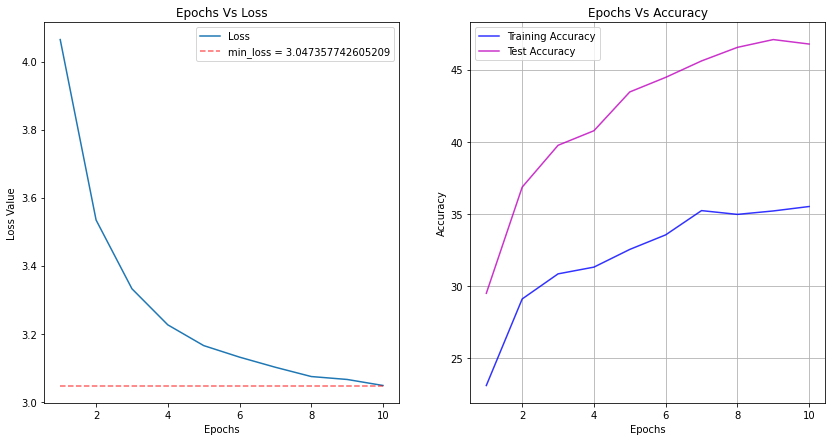

In [ ]:
 model=model.to(device)
 opt = torch.optim.Adam(model.parameters(),lr=0.0001)
 loss_fn = nn.CrossEntropyLoss()
 model_wts = train(model,'resnet18',loss_fn,opt,train_loader,test_loader,10)

In [ ]:
print('Test Accuracy : ', evaluate(model,test_loader))


Test Accuracy :  46.77
